IMPORTAZIONE LIBRERIE

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [3]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\M2\NO_FAULT2


VARIABILE RCOU POTENZA MOTORI

In [4]:
pd.set_option('display.max_rows',700)

In [5]:
#andiamo a prendere una potenza media di 1400 per considerare il momento il cui inizia/finisce il volo
rcou_m2 = pd.read_csv("RCOU.csv")
rcou_m2 = rcou_m2.drop(['LineNo','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'], axis=1)

rcou_m2 = rcou_m2[((rcou_m2['C9'] >= 1400) & (rcou_m2['C10'] >= 1400) & (rcou_m2['C11'] >= 1400) & (rcou_m2['C12'] >= 1400) & (rcou_m2['C13'] >= 1400) & (rcou_m2['C14']>= 1400))]

display(rcou_m2)

,TimeUS,C9,C10,C11,C12,C13,C14
5405,163566849,1428,1405,1402,1431,1408,1425
5409,163609279,1465,1413,1437,1443,1458,1421
5410,163619255,1467,1423,1430,1460,1448,1443
5411,163629795,1468,1433,1425,1476,1439,1463
5412,163640165,1483,1429,1428,1484,1452,1461
...,...,...,...,...,...,...,...
12785,244557395,1571,1407,1483,1506,1447,1539
12786,244568004,1571,1407,1510,1478,1477,1512
12787,244578314,1562,1414,1500,1484,1460,1523
12788,244588431,1556,1418,1490,1492,1444,1535


In [6]:
#xkf utilizzato per fare poi il confronto con i valori di roll, pitch e yaw in att
xkf1_m2 = pd.read_csv("XKF1_0.csv")
xkf1_m2 = xkf1_m2.drop(['LineNo','C','VN','VE','VD','dPD','PN','PE','PD','GX','GY','GZ','OH'], axis=1)
xkf1_m2 = xkf1_m2[((xkf1_m2['TimeUS'] >= 163566849) & (xkf1_m2['TimeUS'] <= 244598703))]
print(xkf1_m2)

          TimeUS  Roll  Pitch     Yaw
5407   163575443  1.23  -0.54   13.30
5408   163586483  1.30  -0.52   13.28
5409   163597278  1.32  -0.53   13.28
5410   163607277  1.30  -0.49   13.28
5411   163617269  1.29  -0.45   13.28
...          ...   ...    ...     ...
12786  244555277 -4.97  -0.94  358.99
12787  244565617 -4.94  -0.95  358.95
12788  244576379 -4.91  -0.90  358.92
12789  244586271 -4.88  -0.88  358.90
12790  244596618 -4.80  -0.96  358.86

[7384 rows x 4 columns]


In [7]:
att_m2 = pd.read_csv("ATT.csv")
att_m2 = att_m2.drop(['LineNo','ErrRP', 'ErrYaw', 'AEKF'], axis=1)
att_m2 = att_m2[((att_m2['TimeUS'] >= 163566849) & (att_m2['TimeUS'] <= 244598703))]
print(att_m2)

          TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw     Yaw
5408   163577191    -0.18  1.23     -0.05  -0.54   13.14   13.30
5409   163588078    -0.19  1.30     -0.04  -0.52   13.14   13.28
5410   163598449    -0.21  1.32     -0.05  -0.53   13.14   13.28
5411   163608458    -0.21  1.30     -0.06  -0.49   13.14   13.28
5412   163618483    -0.22  1.29     -0.08  -0.45   13.14   13.28
...          ...      ...   ...       ...    ...     ...     ...
12788  244556654    -2.93 -4.97     -0.95  -0.94    0.26  359.00
12789  244567274    -2.82 -4.94     -0.93  -0.95    0.26  358.96
12790  244577516    -2.72 -4.91     -0.91  -0.90    0.26  358.93
12791  244587670    -2.61 -4.88     -0.90  -0.88    0.26  358.91
12792  244597835    -2.50 -4.80     -0.89  -0.96    0.26  358.87

[7385 rows x 7 columns]


In [8]:
#controllo corrispondenza valori roll, pitch, yaw
att_m2 = pd.merge_asof(att_m2, xkf1_m2, on="TimeUS", by=["Roll","Pitch","Yaw"], tolerance=100000)
print(att_m2)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw     Yaw
0     163577191    -0.18  1.23     -0.05  -0.54   13.14   13.30
1     163588078    -0.19  1.30     -0.04  -0.52   13.14   13.28
2     163598449    -0.21  1.32     -0.05  -0.53   13.14   13.28
3     163608458    -0.21  1.30     -0.06  -0.49   13.14   13.28
4     163618483    -0.22  1.29     -0.08  -0.45   13.14   13.28
...         ...      ...   ...       ...    ...     ...     ...
7380  244556654    -2.93 -4.97     -0.95  -0.94    0.26  359.00
7381  244567274    -2.82 -4.94     -0.93  -0.95    0.26  358.96
7382  244577516    -2.72 -4.91     -0.91  -0.90    0.26  358.93
7383  244587670    -2.61 -4.88     -0.90  -0.88    0.26  358.91
7384  244597835    -2.50 -4.80     -0.89  -0.96    0.26  358.87

[7385 rows x 7 columns]


In [9]:
#elettricita' che scorre nel motore considerato, al momento ne consideriamo solo 1
esc_1_m2 = pd.read_csv("ESC_1.csv")
esc_1_m2 = esc_1_m2.drop(['LineNo','Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
esc_1_m2 = esc_1_m2[((esc_1_m2['TimeUS'] >= 163566849) & (esc_1_m2['TimeUS'] <= 244598703))]
print(esc_1_m2)

        TimeUS   RPM  Curr
154  163591246  3622  1.85
155  163695433  4160  2.46
156  163808494  4801  2.63
157  163923390  5263  2.98
158  164021666  5453  2.14
159  164134489  5369  1.88
160  164240464  5132  1.49
161  164352423  4926  1.83
162  164458320  4902  1.83
163  164568221  4779  1.62
164  164673868  4700  1.52
165  164783329  4710  1.53
166  164901867  4612  1.43
167  164997580  4500  1.33
168  165106466  4513  1.39
169  165223090  4454  1.42
170  165329818  4422  1.23
171  165436053  4357  1.47
172  165546482  4357  1.35
173  165663187  4421  1.65
174  165884187  4513  1.77
175  165983061  4813  1.78
176  166098399  4811  2.19
177  166205218  4968  2.40
178  166434569  5313  2.23
179  166539673  5307  2.14
180  166643620  5397  1.95
181  166755686  5230  1.91
182  166867688  5285  2.01
183  166969214  5284  1.75
184  167082922  5254  1.65
185  167195256  5002  1.94
186  167299698  5026  1.54
187  167409228  5014  1.50
188  167528667  5005  1.56
189  167635610  4917  1.60
1

In [10]:
#valori di accelerazione e del giroscopio
imu_2_m2 = pd.read_csv("IMU_2.csv")
imu_2_m2 = imu_2_m2.drop(['LineNo','I', 'EG', 'EA', 'T', 'GH', 'AH', 'GHz', 'AHz'], axis=1)
imu_2_m2 = imu_2_m2[((imu_2_m2['TimeUS'] >= 163566849) & (imu_2_m2['TimeUS'] <= 244598703))]
print(imu_2_m2)

          TimeUS      GyrX      GyrY      GyrZ      AccX      AccY       AccZ
21410  163569830 -0.157883 -0.049122  0.001076 -0.247654 -0.092348  -9.644752
21411  163571322  0.067519 -0.051598 -0.000509 -0.250151 -0.090106  -9.675142
21412  163574219  0.228284  0.021609  0.002141 -0.221534 -0.082222  -9.786407
21413  163577030  0.103695  0.056848  0.007526 -0.233001 -0.082376  -9.973126
21414  163580249 -0.100382  0.079942  0.013538 -0.231314 -0.048990 -10.129220
...          ...       ...       ...       ...       ...       ...        ...
49550  244587473  0.096566  0.020024 -0.029690 -0.106935  0.427260  -9.186540
49551  244590131  0.077476 -0.086602 -0.036835 -0.110951  0.451693  -9.558956
49552  244593104  0.003030 -0.033531 -0.036016 -0.065869  0.526836  -9.709108
49553  244595327 -0.013207  0.036862 -0.043949 -0.007833  0.577513  -9.576884
49554  244597656  0.092944 -0.019906 -0.058373  0.034849  0.591417  -9.411427

[28145 rows x 7 columns]


In [11]:
#sincronizzazione dei tempi tra att e imu_2
m2_nofault = pd.merge_asof(att_m2, imu_2_m2, on="TimeUS",  tolerance= 100000)
print(m2_nofault)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw     Yaw      GyrX  \
0     163577191    -0.18  1.23     -0.05  -0.54   13.14   13.30  0.103695   
1     163588078    -0.19  1.30     -0.04  -0.52   13.14   13.28  0.185374   
2     163598449    -0.21  1.32     -0.05  -0.53   13.14   13.28  0.114356   
3     163608458    -0.21  1.30     -0.06  -0.49   13.14   13.28  0.029248   
4     163618483    -0.22  1.29     -0.08  -0.45   13.14   13.28  0.006328   
...         ...      ...   ...       ...    ...     ...     ...       ...   
7380  244556654    -2.93 -4.97     -0.95  -0.94    0.26  359.00  0.111588   
7381  244567274    -2.82 -4.94     -0.93  -0.95    0.26  358.96  0.097734   
7382  244577516    -2.72 -4.91     -0.91  -0.90    0.26  358.93  0.068560   
7383  244587670    -2.61 -4.88     -0.90  -0.88    0.26  358.91  0.096566   
7384  244597835    -2.50 -4.80     -0.89  -0.96    0.26  358.87  0.092944   

          GyrY      GyrZ      AccX      AccY       AccZ  
0     0.056848  0

In [12]:
#sincronizzazione dei tempi tra la tabella ottenuta precedentemente e esc_0 (corrente che passa nel motore)
m2_nofault = pd.merge_asof(esc_1_m2, m2_nofault, on="TimeUS",  tolerance= 100000)
print(m2_nofault)

        TimeUS   RPM  Curr  DesRoll   Roll  DesPitch  Pitch  DesYaw     Yaw  \
0    163591246  3622  1.85    -0.19   1.30     -0.04  -0.52   13.14   13.28   
1    163695433  4160  2.46    -0.25   1.41     -0.21  -0.32   13.14   13.27   
2    163808494  4801  2.63    -0.40   1.69     -0.31   0.04   13.14   13.37   
3    163923390  5263  2.98    -1.16   2.15     -0.54   0.31   13.14   14.01   
4    164021666  5453  2.14    -2.01   1.39     -0.87   0.41   13.15   15.17   
5    164134489  5369  1.88    -3.11  -0.01     -1.24   0.14   13.17   16.67   
6    164240464  5132  1.49    -4.81  -1.21     -1.94  -0.26   13.22   18.10   
7    164352423  4926  1.83    -6.67  -4.06     -2.66  -0.55   13.29   19.54   
8    164458320  4902  1.83    -8.07  -6.24     -3.24  -0.40   13.37   20.63   
9    164568221  4779  1.62    -8.94  -7.31     -3.69  -0.50   13.43   21.48   
10   164673868  4700  1.52    -8.92  -7.44     -3.84  -1.25   13.43   22.14   
11   164783329  4710  1.53    -8.33  -6.85     -4.13

In [13]:
#aggiornamento del tempo ponendo a 0 il momento in cui il volo inizia per noi e settaggio della variabile guasto
m2_nofault["TimeUS"] = m2_nofault["TimeUS"] - m2_nofault.iloc[0]["TimeUS"]
m2_nofault["TimeUS"] = m2_nofault["TimeUS"].astype(int)
m2_nofault["Guasto"] = 0
print(m2_nofault)

       TimeUS   RPM  Curr  DesRoll   Roll  DesPitch  Pitch  DesYaw     Yaw  \
0           0  3622  1.85    -0.19   1.30     -0.04  -0.52   13.14   13.28   
1      104187  4160  2.46    -0.25   1.41     -0.21  -0.32   13.14   13.27   
2      217248  4801  2.63    -0.40   1.69     -0.31   0.04   13.14   13.37   
3      332144  5263  2.98    -1.16   2.15     -0.54   0.31   13.14   14.01   
4      430420  5453  2.14    -2.01   1.39     -0.87   0.41   13.15   15.17   
5      543243  5369  1.88    -3.11  -0.01     -1.24   0.14   13.17   16.67   
6      649218  5132  1.49    -4.81  -1.21     -1.94  -0.26   13.22   18.10   
7      761177  4926  1.83    -6.67  -4.06     -2.66  -0.55   13.29   19.54   
8      867074  4902  1.83    -8.07  -6.24     -3.24  -0.40   13.37   20.63   
9      976975  4779  1.62    -8.94  -7.31     -3.69  -0.50   13.43   21.48   
10    1082622  4700  1.52    -8.92  -7.44     -3.84  -1.25   13.43   22.14   
11    1192083  4710  1.53    -8.33  -6.85     -4.13  -1.92   12.

In [14]:
path_file = path_file.replace(r"M2\NO_FAULT2", "")
os.chdir(path_file)
m2_nofault.to_csv('m2_nofault.csv', index=False)
print(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\


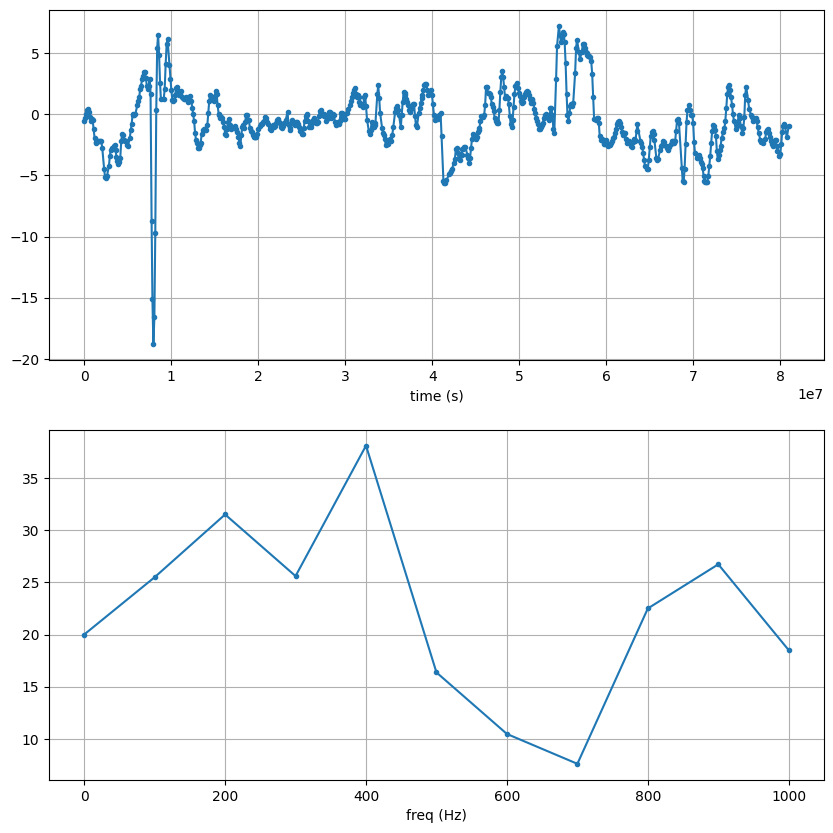

In [15]:
t = m2_nofault["TimeUS"]
y = m2_nofault["Pitch"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

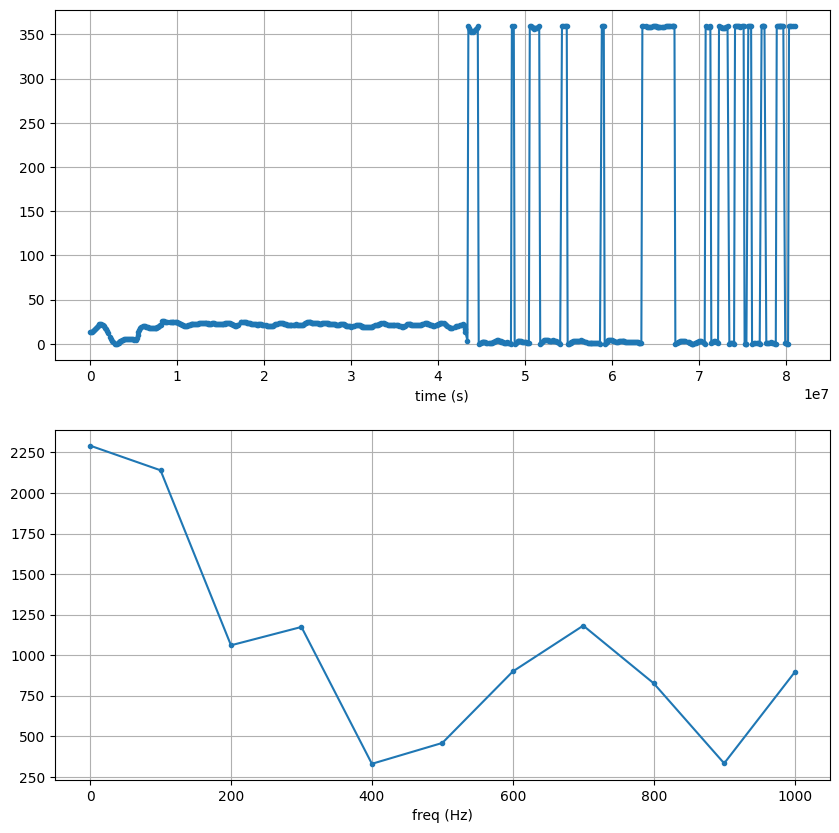

In [16]:
t = m2_nofault["TimeUS"]
y = m2_nofault["Yaw"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

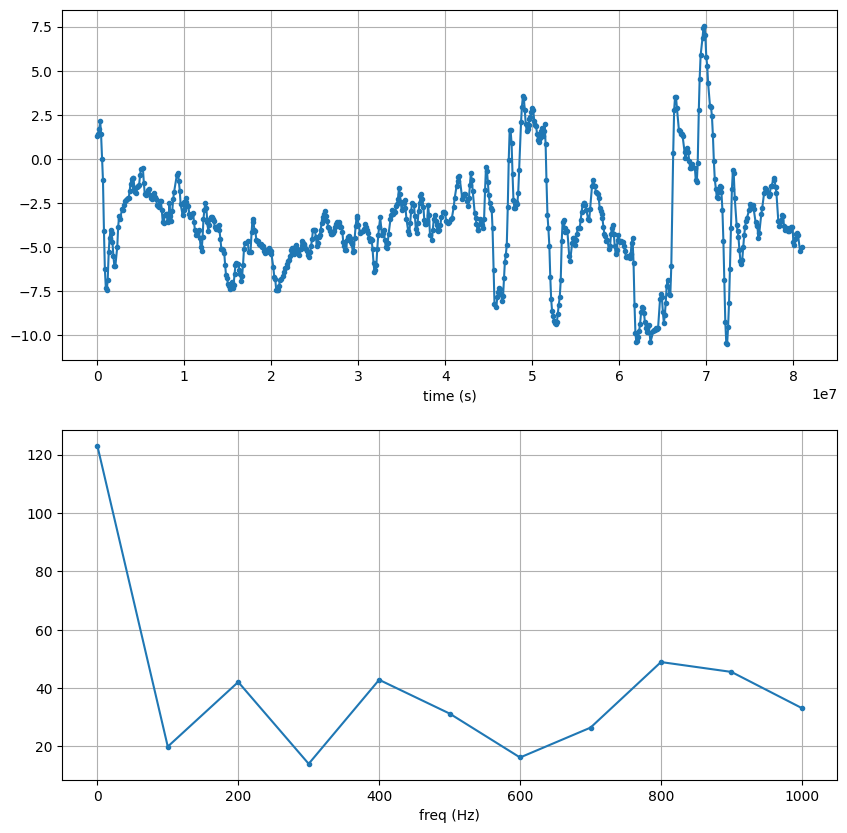

In [17]:
t = m2_nofault["TimeUS"]
y = m2_nofault["Roll"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

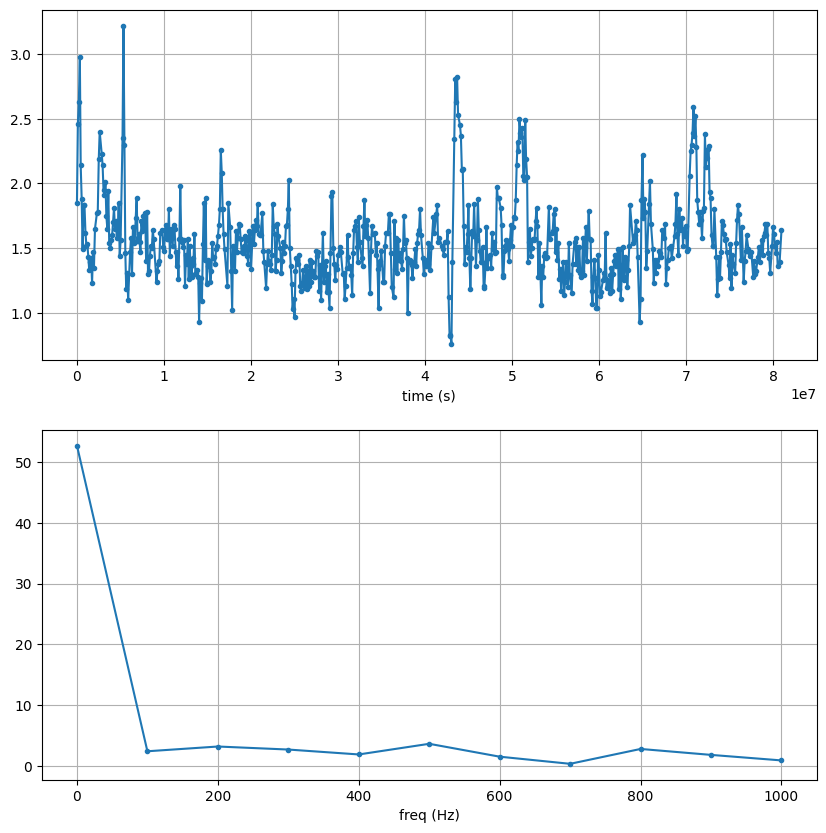

In [18]:
t = m2_nofault["TimeUS"]
y = m2_nofault["Curr"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

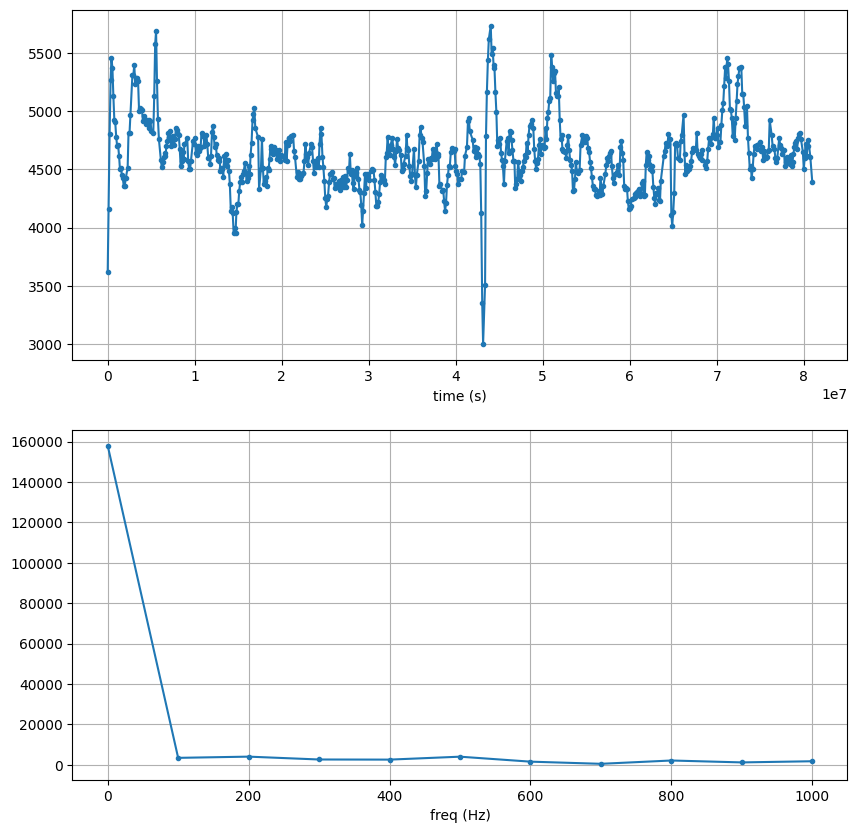

In [19]:
t = m2_nofault["TimeUS"]
y = m2_nofault["RPM"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

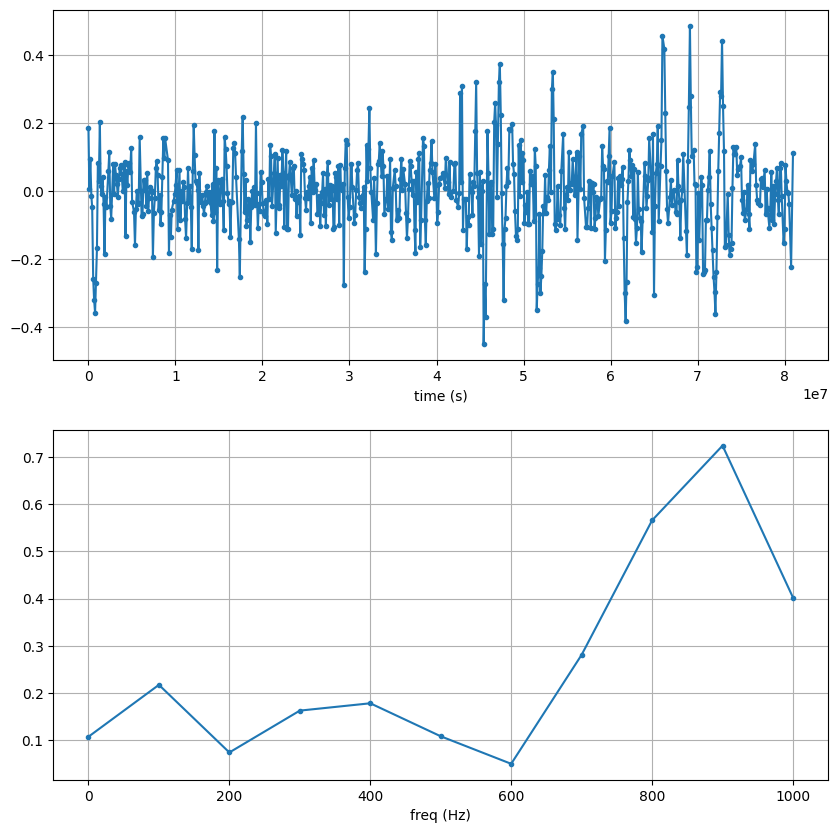

In [20]:
t = m2_nofault["TimeUS"]
y = m2_nofault["GyrX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

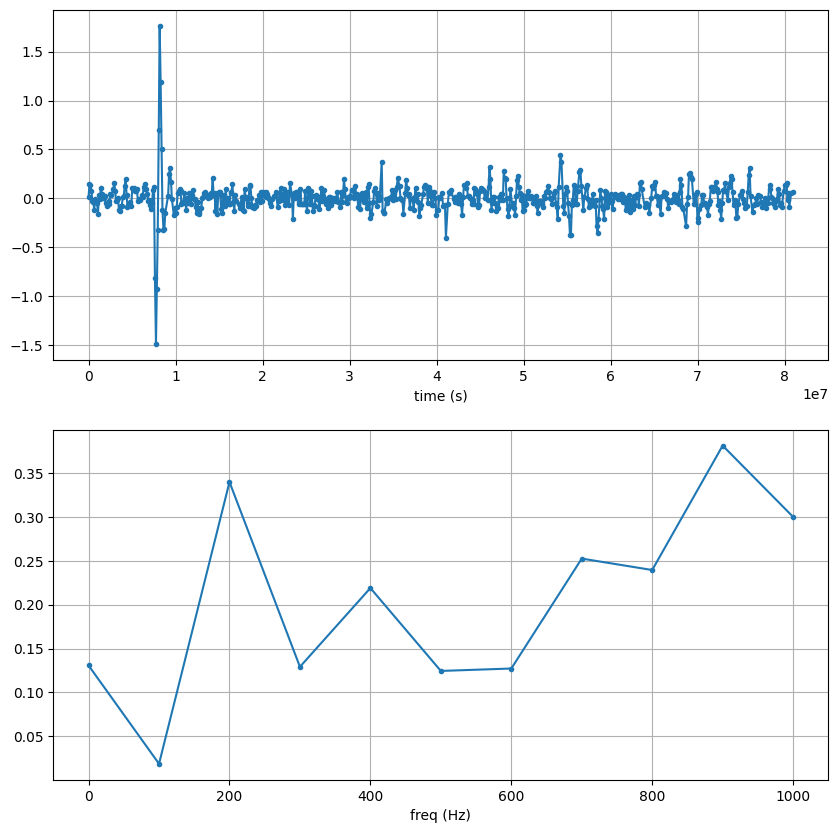

In [21]:
t = m2_nofault["TimeUS"]
y = m2_nofault["GyrY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

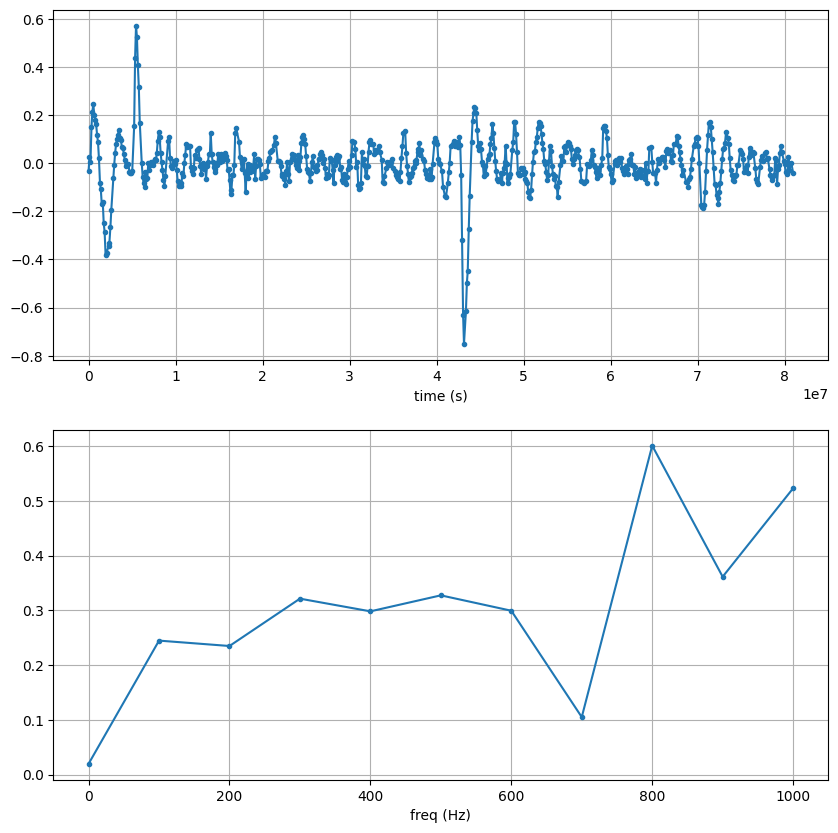

In [22]:
t = m2_nofault["TimeUS"]
y = m2_nofault["GyrZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

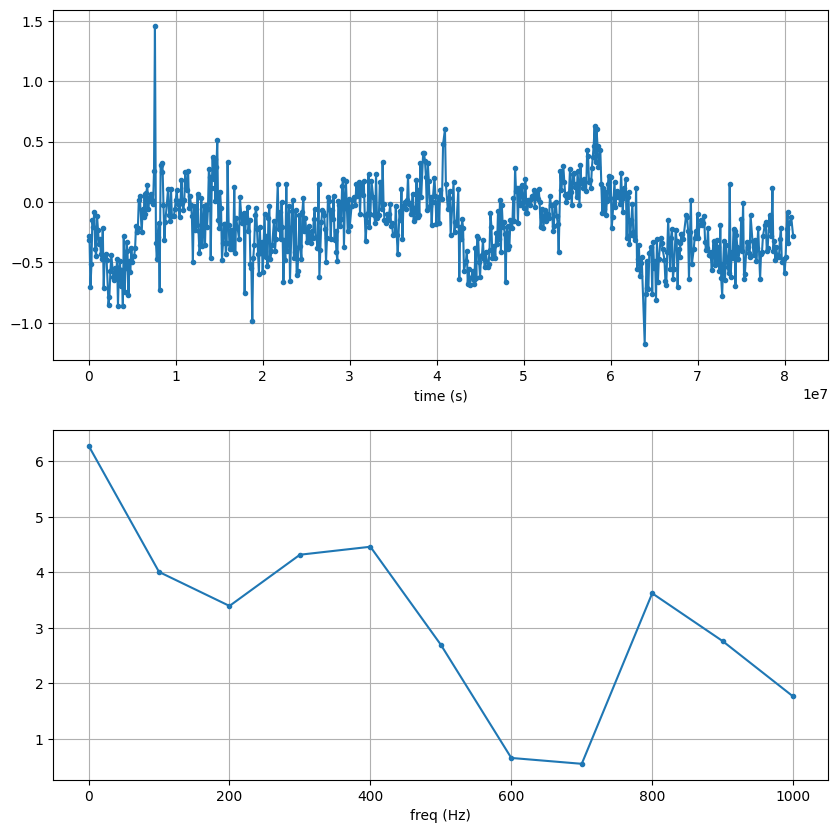

In [23]:
t = m2_nofault["TimeUS"]
y = m2_nofault["AccX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

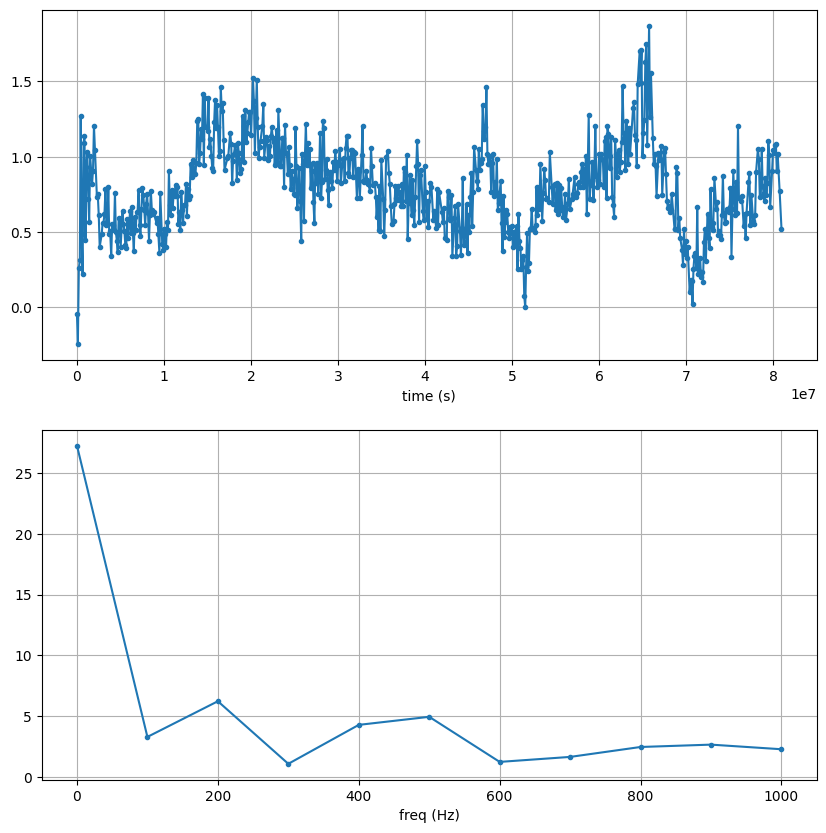

In [24]:
t = m2_nofault["TimeUS"]
y = m2_nofault["AccY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

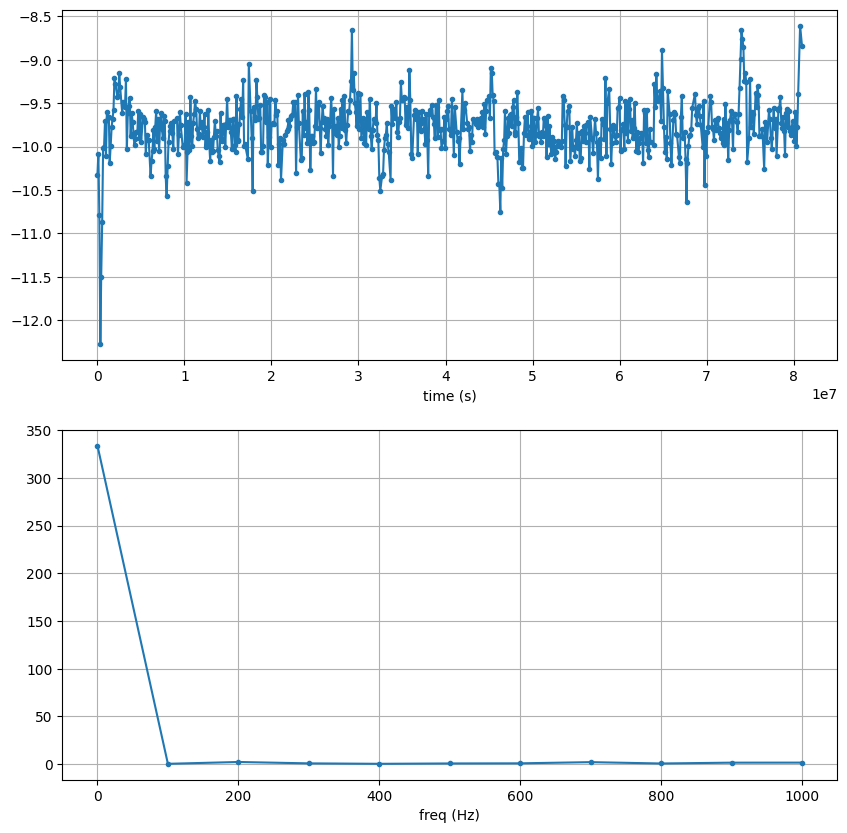

In [25]:
t = m2_nofault["TimeUS"]
y = m2_nofault["AccZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()